# Heart Disease Research Part II
In this project, we’ll investigate some data from a sample of patients who were evaluated for heart disease at the Cleveland Clinic Foundation. The data was downloaded from the UCI Machine Learning Repository and then cleaned for analysis. The principal investigators responsible for data collection were:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2_contingency 

In [3]:
#Load data
heart = pd.read_csv('heart_disease.csv')

## Inspect the Data

The data has been saved as a dataframe named heart. It contains the following variables:

- **age:** age in years
- **sex:** sex assigned at birth; 'male' or 'female'
- **trestbps:** resting blood pressure in mm Hg
- **chol:** serum cholesterol in mg/dl
- **cp:** chest pain type ('typical angina', 'atypical angina', 'non-anginal pain', or 'asymptomatic')
- **exang:** whether the patient experiences exercise-induced angina (1: yes; 0: no)
- **fbs:** whether the patient’s fasting blood sugar is >120 mg/dl (1: yes; 0: no)
- **thalach:** maximum heart rate achieved in exercise test
- **heart_disease:** whether the patient is found to have heart disease ('presence': diagnosed with heart disease; 'absence': no heart disease)

Let's inspect the data with .head()

In [4]:
print(heart.head())

    age     sex  trestbps   chol                cp  exang  fbs  thalach  \
0  63.0    male     145.0  233.0    typical angina    0.0  1.0    150.0   
1  67.0    male     160.0  286.0      asymptomatic    1.0  0.0    108.0   
2  67.0    male     120.0  229.0      asymptomatic    1.0  0.0    129.0   
3  37.0    male     130.0  250.0  non-anginal pain    0.0  0.0    187.0   
4  41.0  female     130.0  204.0   atypical angina    0.0  0.0    172.0   

  heart_disease  
0       absence  
1      presence  
2      presence  
3       absence  
4       absence  



## Predictors of Heart Disease
Each of the patients in this dataset underwent an exercise test, during which their heart rate was monitored. For each patient, *thalach* gives us the highest heart rate that the patient achieved during this test.

Is thalach associated with whether or not a patient will ultimately be diagnosed with heart disease? Let's use sns.boxplot() to plot side by side box plots of thalach for patients who were and were not diagnosed with heart disease (indicated by the heart_disease variable). Do you think there is a relationship between these variables?

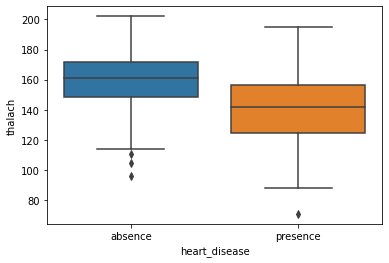

In [5]:
sns.boxplot(x = heart.heart_disease, y = heart.thalach)
plt.show()

In order to investigate this question further, let's save the values for thalach among patients who were diagnosed with heart disease as a variable named thalach_hd. Then save the values of thalach among patients who were not diagnosed with heart disease as thalach_no_hd.

In [6]:
thalach_hd = heart.thalach[heart.heart_disease == 'presence']
thalach_no_hd = heart.thalach[heart.heart_disease == 'absence']
print(thalach_hd)
print(thalach_no_hd)

1      108.0
2      129.0
6      160.0
8      147.0
9      155.0
       ...  
297    123.0
298    132.0
299    141.0
300    115.0
301    174.0
Name: thalach, Length: 139, dtype: float64
0      150.0
3      187.0
4      172.0
5      178.0
7      163.0
       ...  
288    163.0
289    169.0
291    166.0
295    182.0
302    173.0
Name: thalach, Length: 164, dtype: float64


We'll calculate and print the difference in mean thalach for patients diagnosed with heart disease compared to patients without heart disease. Then do the same for the median difference.

In [7]:
mean_diff = np.mean(thalach_no_hd) - np.mean(thalach_hd)
print('thalach mean Difference: ', mean_diff)
median_diff = np.median(thalach_no_hd) - np.median(thalach_hd)
print('thalach median Difference: ', median_diff)

thalach mean Difference:  19.11905597473242
thalach median Difference:  19.0



We’d like to find out if the average thalach of a heart disease patient is significantly different from the average thalach for a person without heart disease.

Let's test the following null and alternative hypotheses:

- **Null:** The average thalach for a person with heart disease is equal to the average thalach for a person without heart disease.
- **Alternative:** The average thalach for a person with heart disease is NOT equal to the average thalach for a person without heart disease.

In [8]:
ttest, pval = ttest_ind(thalach_hd, thalach_no_hd)
print(pval)

3.456964908430172e-14


**Results:** The p-value is significant, we “reject the null hypothesis” and conclude that there is a significant difference in thalach for people with heart disease compared to people without heart disease.

## Age Prediction in Heart Disease

Using the same methodology of the previous hypothesis, we'll be checking the importance of age in the probability of having a heart disease. 

- **Null:** The age for a person has no significance in them having a heart disease
-  **Alternative:** The age of a person has an importance in the having a heart disease

In [9]:
age_hd = heart.age[heart.heart_disease == 'presence']
age_no_hd = heart.age[heart.heart_disease == 'absence']

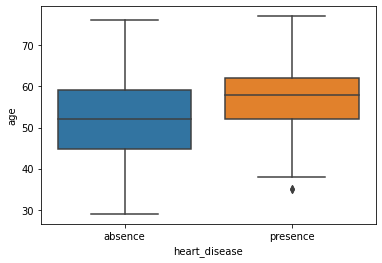

In [10]:
plt.clf()
sns.boxplot(x = heart.heart_disease, y = heart.age)
plt.show()

In [11]:
ttest_age, pval_age = ttest_ind(age_hd, age_no_hd)
print('P-value for they Age variable: ', pval_age)

P-value for they Age variable:  8.955636917529706e-05


**Result:** The null hypothesis is rejected, there is a significance between the age of a person an if they have a heart disease or not

## Resting Blood Pressure Prediction in Heart Disease 

We'll be checking if the variable trestbps (Resting Blood pressure in mmHg) is significantly associated with heart disease or not 
- **Null:** The average resting blood pressure of a person with no heart disease is equal to the average resting blood pressure of a person with heart disease
- **Alternative:** The average resting blood pressure of a person with no heart disease is NOT equal to the average resting blood pressure of a person with heart disease

In [12]:
trest_hd = heart.trestbps[heart.heart_disease == 'presence']
trest_no_hd = heart.trestbps[heart.heart_disease == 'absence']

In [13]:
mean_diff_trestbps = abs(np.mean(trest_no_hd) - np.mean(trest_hd))
print('trestbps mean Difference: ', mean_diff_trestbps)
median_diff_trestbps = np.median(trest_no_hd) - np.median(trest_hd)
print('trestbps median Difference: ', median_diff_trestbps)

trestbps mean Difference:  5.318345323740999
trestbps median Difference:  0.0


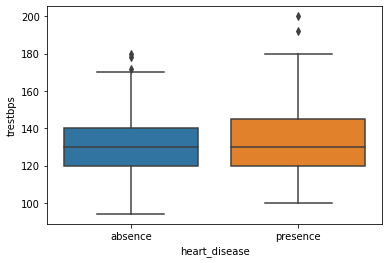

In [14]:
plt.clf()
sns.boxplot(x = heart.heart_disease, y = heart.trestbps)
plt.show()

In [15]:
ttest_trest, pval_trest = ttest_ind(trest_hd, trest_no_hd)
print('P-value for the Trestbps variable: ', pval_trest)

P-value for the Trestbps variable:  0.008548268928594928


**Result:** There is a significant p-value, we reject the null hypothesis, meaning there is a difference between the average resting blood pressure of a person with no heart disease and one who does have a heart disease. 

## Cholesterol Prediction in Heart Disease 

We'll be checking if the cholesterol is significantly associated with heart disease or not 
- **Null:** The average cholesterol of a person with no heart disease is equal to the average cholesterol of a person with heart disease
- **Alternative:** The average cholesterol of a person with no heart disease is NOT equal to the average cholesterol of a person with heart disease

In [16]:
chol_hd = heart.chol[heart.heart_disease == 'presence']
chol_no_hd = heart.chol[heart.heart_disease == 'absence']

In [17]:
mean_diff_chol = abs(np.mean(chol_no_hd) - np.mean(chol_hd))
print('cholesterol mean Difference: ', mean_diff_chol)
median_diff_chol = np.median(chol_no_hd) - np.median(chol_hd)
print('cholesterol median Difference: ', median_diff_chol)

cholesterol mean Difference:  8.834576241445887
cholesterol median Difference:  -14.5


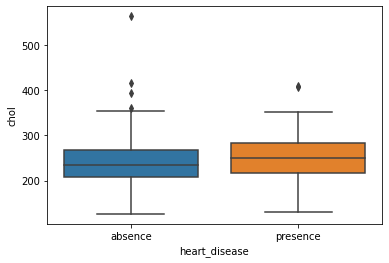

In [18]:
plt.clf()
sns.boxplot(x = heart.heart_disease, y = heart.chol)
plt.show()

In [19]:
ttest_chol, pval_chol = ttest_ind(chol_hd, chol_no_hd)
print('P-value for the Chol variable: ', pval_chol)

P-value for the Chol variable:  0.13914167020436527


**Result:** The p-value is not-significant, we choose the null hypothesis, the average cholesterol of people with no heart disease is equal to one of people with heart disease 

## Chest Pain and Max Heart Rate 

Next, let’s investigate the relationship between thalach (maximum heart rate achieved during exercise) and the type of heart pain a person experiences. We'll create a set of side-by-side box plots of thalach for each chest pain type in the data. 

Are there any chest pain types for which average thalach is significantly higher or lower (compared to other chest pain types)?

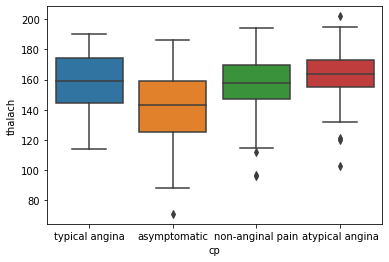

In [20]:
plt.clf()
sns.boxplot(x= heart.cp, y= heart.thalach)
plt.show()


To investigate this further, let's save the values of thalach for patients who experienced each type of chest pain as thalach_typical, thalach_asymptom, thalach_nonangin, and thalach_atypical, respectively.

In [21]:
thalach_typical = heart.thalach[heart.cp == 'typical angina']
thalach_asymptom = heart.thalach[heart.cp == 'asymptomatic']
thalach_nonangin = heart.thalach[heart.cp == 'non-anginal pain']
thalach_atypical = heart.thalach[heart.cp == 'atypical angina']

We'll run a single hypothesis test to address the following null and alternative hypotheses:

- **Null:** People with typical angina, non-anginal pain, atypical angina, and asymptomatic people all have the same average thalach.
- **Alternative:** People with typical angina, non-anginal pain, atypical angina, and asymptomatic people do not all have the same average thalach.

Is there at least one pair of chest pain categories for which people in those categories have significantly different thalach?

In [22]:
fstat, pval_cp = f_oneway(thalach_typical, thalach_asymptom, thalach_nonangin, thalach_atypical)
print(pval_cp)

1.9065505247705008e-10


**Result:** the p-value is significant, we reject the null hypothesis and conclude people with typical angina, non-anginal pain, atypical angina, and asymptomatic people do not all have the same average thalach. 

Let's run another hypothesis test to determine which of those pairs are significantly different.

In [23]:
tukey_results_cp = pairwise_tukeyhsd(heart.thalach, heart.cp, 0.05)
print(tukey_results_cp)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1           group2      meandiff p-adj   lower    upper  reject
-------------------------------------------------------------------------
    asymptomatic  atypical angina  21.7394  0.001  12.7439  30.735   True
    asymptomatic non-anginal pain  14.7264  0.001    7.258 22.1948   True
    asymptomatic   typical angina   15.276 0.0081   2.9702 27.5817   True
 atypical angina non-anginal pain   -7.013 0.2481 -16.7591   2.733  False
 atypical angina   typical angina  -6.4635 0.6069 -20.2707  7.3438  False
non-anginal pain   typical angina   0.5495    0.9  -12.315 13.4141  False
-------------------------------------------------------------------------


**Result:** We reject the null hypothesis dor all asymptotic groups, meaning there is a significant difference between these groups and others. 

## Heart Disease and Chest Pain


Finally, let’s investigate the relationship between the kind of chest pain a person experiences and whether or not they have heart disease. We'll create a contingency table of cp and heart_disease and save it as Xtab, then print it out.

In [24]:
Xtab = pd.crosstab(heart.cp, heart.heart_disease)
print(Xtab)

heart_disease     absence  presence
cp                                 
asymptomatic           39       105
atypical angina        41         9
non-anginal pain       68        18
typical angina         16         7


We'll run a hypothesis test for the following null and alternative hypotheses:

**Null:** There is NOT an association between chest pain type and whether or not someone is diagnosed with heart disease.

**Alternative:** There is an association between chest pain type and whether or not someone is diagnosed with heart disease.

In [25]:
chi2, pval_chi2, dof, expected = chi2_contingency(Xtab)
print(pval_chi2)

1.2517106007837527e-17


**Result:** The p-value is smaller than our 0.05 significance threshold, so we reject the null hypothesis and conclude that there is an association between chest pain type and whether or not someone is diagnosed with heart disease. 